# **Analisis klaster pelanggan toko online**


## **Businnes Understanding**
Menggunakan algoritma K-means dan metodologi CRISP-DM untuk mengklaster pelanggan berdasarkan perilaku pembelian

## **Data Understanding**


In [108]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [109]:
# hubungkan ke gdrive
from google.colab import drive
path = '/content/drive'
drive.mount(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
# membaca file dataset
file_path = f'{path}/My Drive/data mining tb/customer_shopping_data.csv'
df = pd.read_csv(file_path)
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


## **Data Preparation**

In [111]:
# mencari apakah ada data null/NaN
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [112]:
# Menghitung jumlah transaksi unik per pelanggan
frequences = df.groupby('customer_id')['invoice_no'].nunique().reset_index()

# Mengganti nama kolom untuk kejelasan
frequences.columns = ['customer_id', 'frequency']

frequences

,customer_id,frequency
0,C100004,1
1,C100005,1
2,C100006,1
3,C100012,1
4,C100019,1
...,...,...
99452,C999886,1
99453,C999910,1
99454,C999974,1
99455,C999976,1


In [113]:
# Menggabungkan frekuensi pembelian dengan data asli
df_new = pd.merge(df, frequences, on='customer_id', how='left')
df_new

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,frequency
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,1
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,1
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,1
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,1
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,1
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,1
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,1
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,1
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,1


In [114]:
# Menyimpan dataset yang telah digabungkan
file_path = f'{path}/My Drive/data mining tb/customer_shopping_data_new.csv'
df_new.to_csv(file_path, index=False)

In [115]:
df_new

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,frequency
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,1
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,1
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,1
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,1
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,1
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,1
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,1
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,1
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,1


In [116]:
# Membuat kolom total_price
df_new['total_price'] = df_new['quantity'] * df_new['price']
df_new

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,frequency,total_price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,1,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,1,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,1,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,1,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,1,242.40
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,1,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,1,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,1,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,1,16800.00


In [117]:
# Menyimpan dataset yang telah digabungkan
df_new.to_csv(file_path, index=False)

In [118]:
# drop kolom yang tidak digunakan
column = ['shopping_mall']
df_new = df_new.drop(column, axis = 1)
df_new

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,frequency,total_price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,1,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,1,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,1,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,1,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,1,242.40
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,1,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,1,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,1,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,1,16800.00


In [119]:
df_new['invoice_date'] = pd.to_datetime(df_new['invoice_date'], dayfirst=True)
df_new

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,frequency,total_price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,1,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,1,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,1,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,1,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,1,242.40
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,1,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,1,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,1,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,1,16800.00


In [120]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   frequency       99457 non-null  int64         
 10  total_price     99457 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 8.3+ MB


In [121]:
df_new.describe()

,age,quantity,price,invoice_date,frequency,total_price
count,99457.000000,99457.000000,99457.000000,99457,99457.0,99457.000000
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424,1.0,2528.789268
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00,1.0,5.230000
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00,1.0,136.350000
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00,1.0,600.170000
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00,1.0,2700.720000
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00,1.0,26250.000000
std,14.990054,1.413025,941.184567,NaN,0.0,4222.475781


In [122]:
grouped = df_new.groupby('category').size().reset_index(name='count')
duplicate_ids = grouped[grouped['count'] > 1]
duplicate_ids

,category,count
0,Books,4981
1,Clothing,34487
2,Cosmetics,15097
3,Food & Beverage,14776
4,Shoes,10034
5,Souvenir,4999
6,Technology,4996
7,Toys,10087


In [123]:
# Mengonversi gender menjadi numerik
Gender = df_new['gender'].value_counts().reset_index()
Gender

,gender,count
0,Female,59482
1,Male,39975


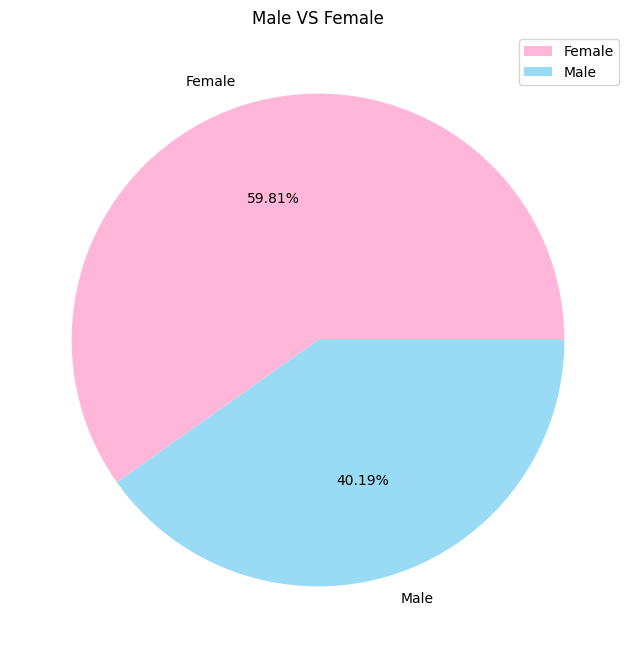

In [124]:
plt.figure(figsize=(8,8))
plt.pie(Gender['count'],
        labels=Gender['gender'],autopct='%1.2f%%',
        colors=["#FFB6D9", "#99DBF5"]
       )
plt.title('Male VS Female')
plt.legend()
plt.show()

In [125]:
Category = df_new['category'].value_counts()
Category

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

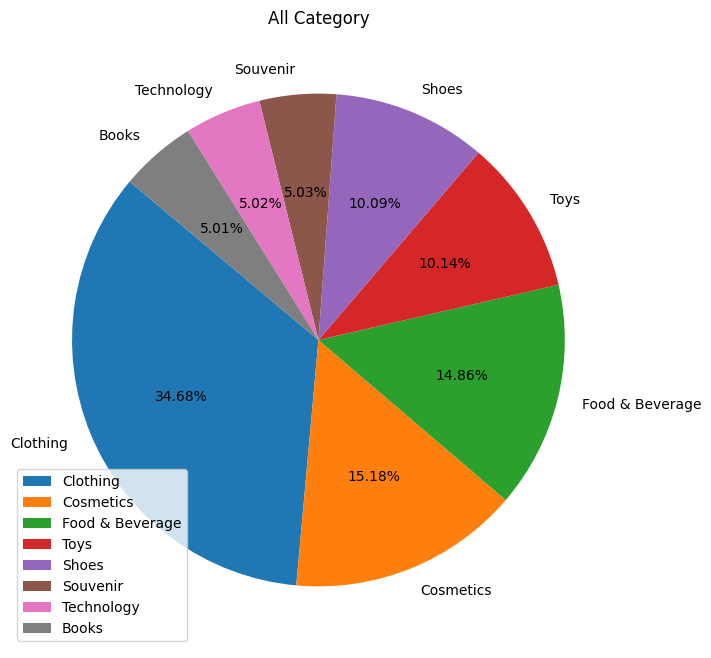

In [126]:
plt.figure(figsize=(8,8))
plt.pie(Category,
        labels=Category.index,autopct='%1.2f%%',
        startangle=140
       )
plt.title('All Category')
plt.legend()
plt.show()

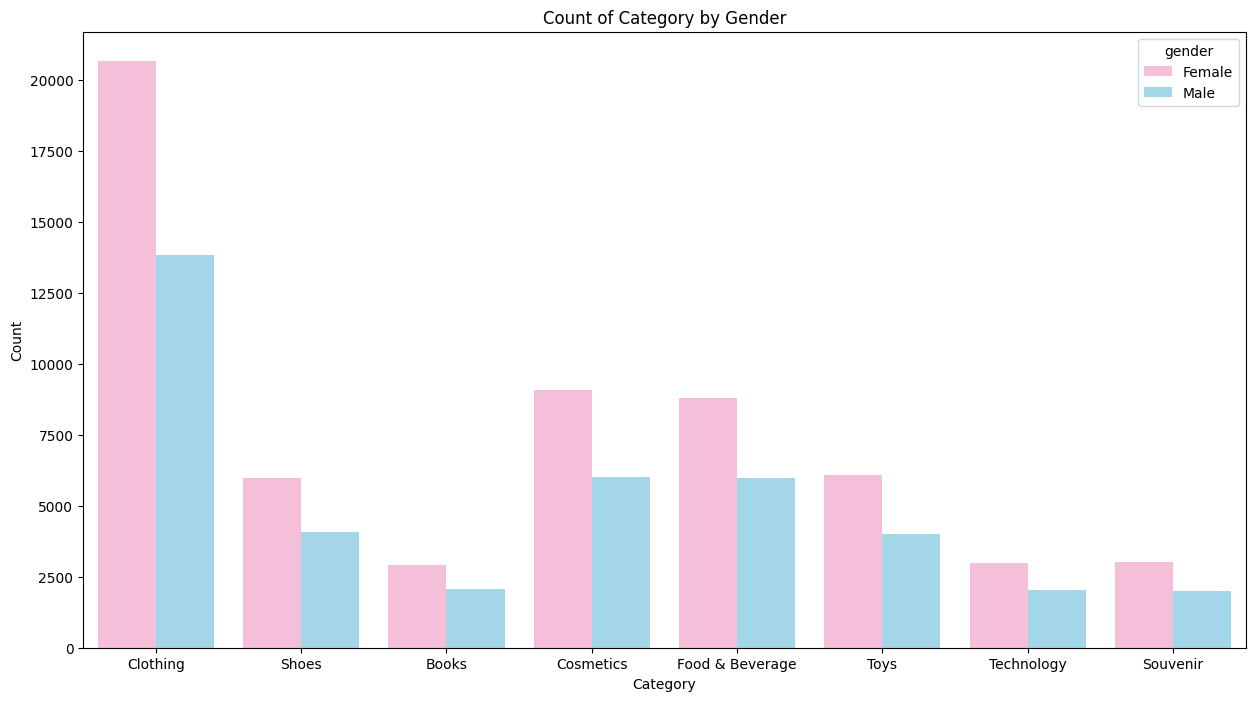

In [127]:
plt.figure(figsize=(15, 8))
sn.countplot(data=df_new, x=df_new['category'], hue=df_new['gender'],palette=["#FFB6D9", "#99DBF5"])
plt.title('Count of Category by Gender')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [128]:
Age = df_new.groupby(['age', 'gender']).size().reset_index(name='count')
Age

,age,gender,count
0,18,Female,1079
1,18,Male,765
2,19,Female,1133
3,19,Male,803
4,20,Female,1102
...,...,...,...
99,67,Male,766
100,68,Female,1148
101,68,Male,745
102,69,Female,1143


In [129]:
date_counts = df_new['invoice_date'].value_counts().reset_index(name='count')
date_counts.columns = ['invoice_date', 'count']
date_counts

,invoice_date,count
0,2021-11-24,159
1,2023-02-26,156
2,2021-01-06,155
3,2022-07-25,155
4,2022-10-23,155
...,...,...
792,2021-10-27,98
793,2021-05-29,98
794,2021-09-30,96
795,2021-12-02,94


In [130]:
total_price_by_date = df_new.groupby('invoice_date')['total_price'].sum().reset_index().sort_values(by='total_price', ascending=False)
total_price_by_date.columns = ['invoice_date', 'total_price']
total_price_by_date

,invoice_date,total_price
300,2021-10-28,534906.86
344,2021-12-11,468232.91
770,2023-02-10,465591.72
44,2021-02-14,462195.82
371,2022-01-07,461771.81
...,...,...
365,2022-01-01,179147.49
422,2022-02-27,176521.98
754,2023-01-25,176184.50
171,2021-06-21,172961.56


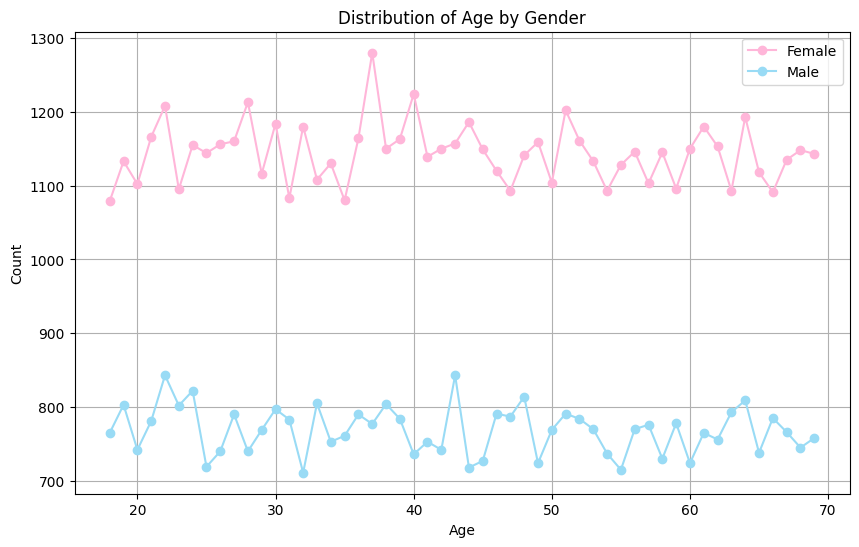

In [131]:
plt.figure(figsize=(10, 6))

# Memisahkan data berdasarkan gender
for gender, color in zip(df_new['gender'].unique(), ["#FFB6D9", "#99DBF5"]):
    plt.plot('age', 'count', data=Age[Age['gender']==gender], marker='o', color=color, label=gender)

# Menambahkan judul dan label
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()

In [132]:
count_category = df_new.groupby(['category', 'gender']).size().reset_index(name='count')
count_category

,category,gender,count
0,Books,Female,2906
1,Books,Male,2075
2,Clothing,Female,20652
3,Clothing,Male,13835
4,Cosmetics,Female,9070
5,Cosmetics,Male,6027
6,Food & Beverage,Female,8804
7,Food & Beverage,Male,5972
8,Shoes,Female,5967
9,Shoes,Male,4067


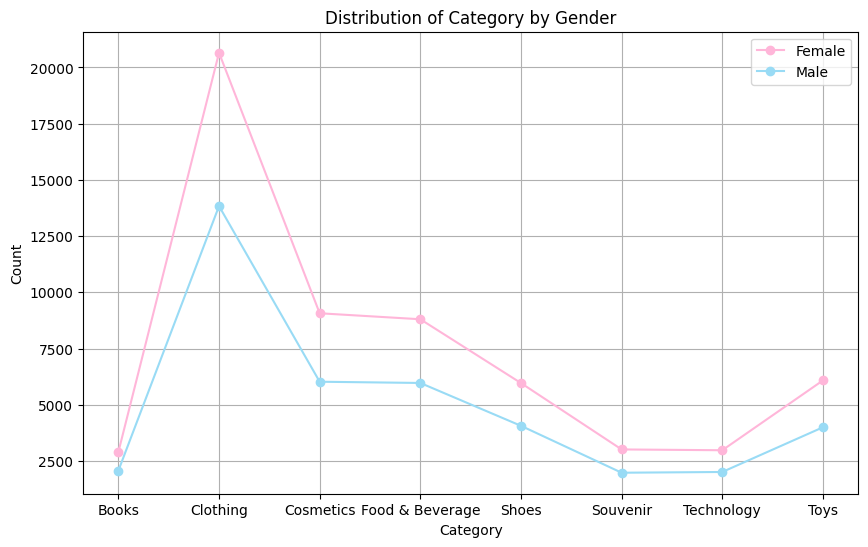

In [133]:
plt.figure(figsize=(10, 6))

# Memisahkan data berdasarkan gender
for gender, color in zip(df_new['gender'].unique(), ["#FFB6D9", "#99DBF5"]):
    plt.plot('category', 'count', data=count_category[count_category['gender']==gender], marker='o', color=color, label=gender)

# Menambahkan judul dan label
plt.title('Distribution of Category by Gender')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()

In [134]:
# Membuat mapping dari kategori ke angka
category_mapping = {category: idx for idx, category in enumerate(df_new['category'].unique())}
df_new['category'] = df_new['category'].map(category_mapping)

In [135]:
df_new['gender'] = df_new['gender'].map({'Male': 1, 'Female': 0})

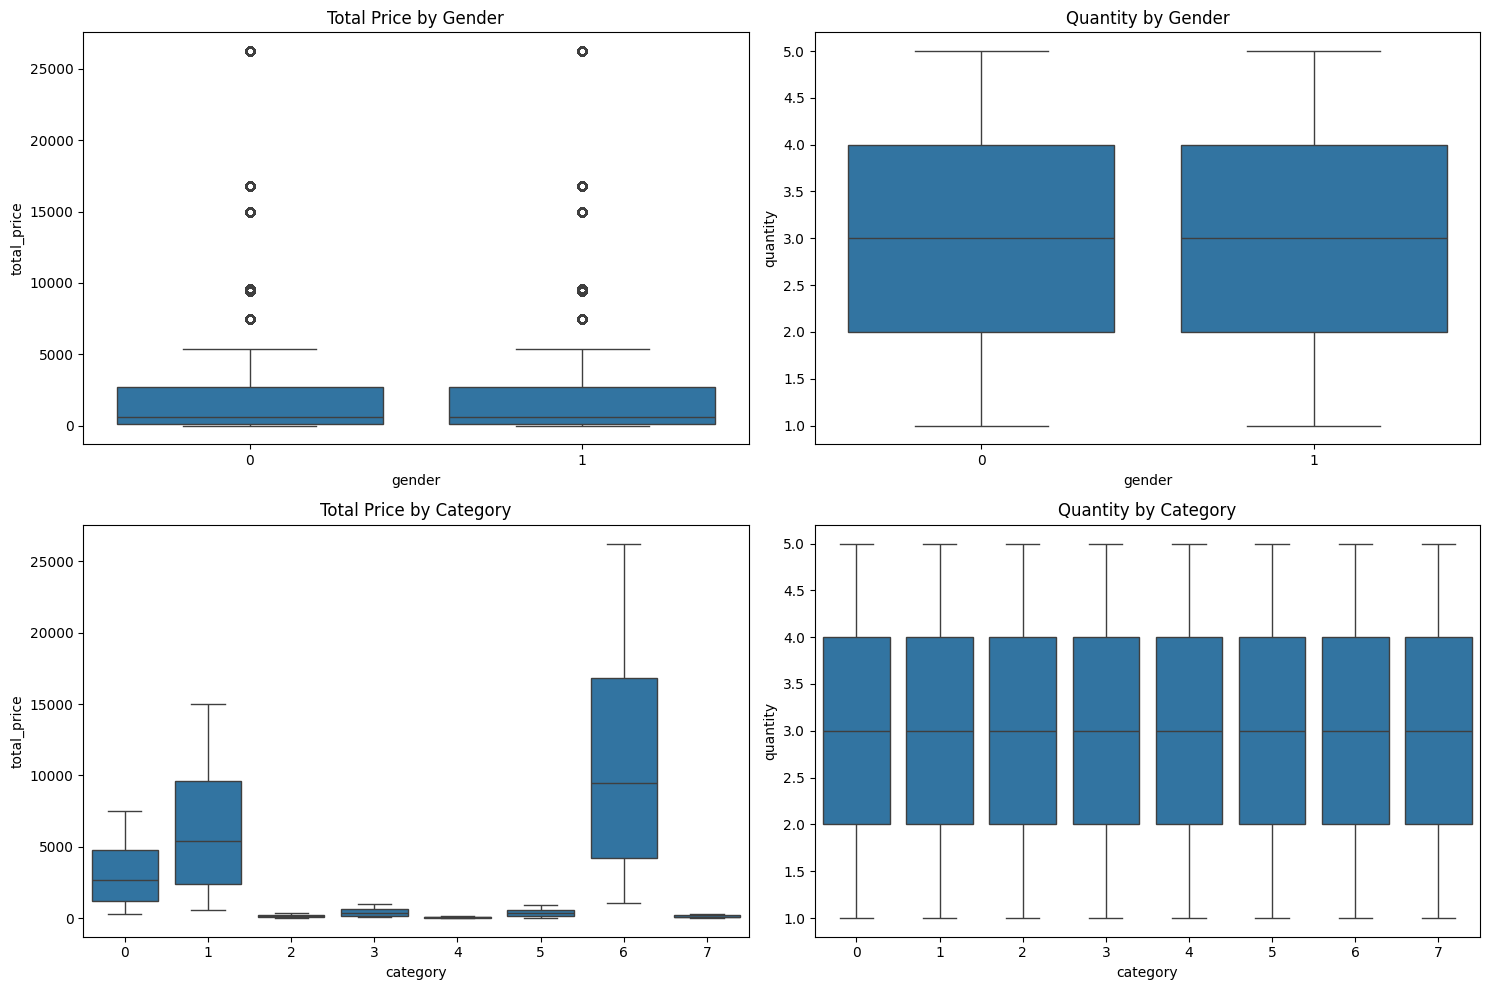

In [136]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Box plot for 'total_price' separated by 'gender'
plt.subplot(2, 2, 1)
sn.boxplot(x='gender', y='total_price', data=df_new)
plt.title('Total Price by Gender')

# Box plot for 'quantity' separated by 'gender'
plt.subplot(2, 2, 2)
sn.boxplot(x='gender', y='quantity', data=df_new)
plt.title('Quantity by Gender')

# Box plot for 'total_price' separated by 'category'
plt.subplot(2, 2, 3)
sn.boxplot(x='category', y='total_price', data=df_new)
plt.title('Total Price by Category')

# Box plot for 'quantity' separated by 'category'
plt.subplot(2, 2, 4)
sn.boxplot(x='category', y='quantity', data=df_new)
plt.title('Quantity by Category')

plt.tight_layout()
plt.show()


In [137]:
df_new.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,frequency,total_price
0,I138884,C241288,0,28,0,5,1500.40,Credit Card,2022-08-05,1,7502.00
1,I317333,C111565,1,21,1,3,1800.51,Debit Card,2021-12-12,1,5401.53
2,I127801,C266599,1,20,0,1,300.08,Cash,2021-11-09,1,300.08
3,I173702,C988172,0,66,1,5,3000.85,Credit Card,2021-05-16,1,15004.25
4,I337046,C189076,0,53,2,4,60.60,Cash,2021-10-24,1,242.40


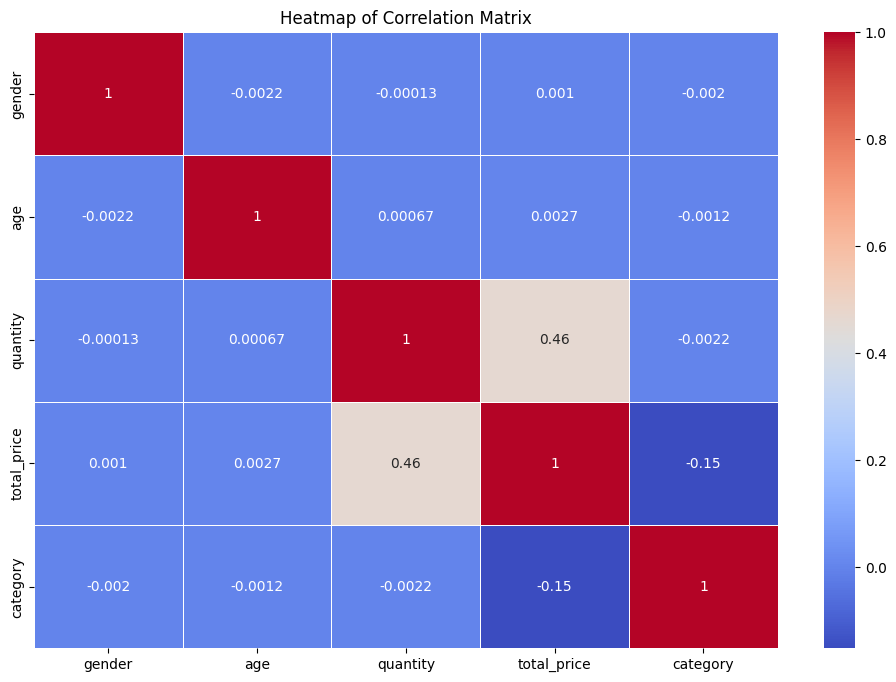

In [138]:
# Menghitung matriks korelasi
correlation_matrix = df_new[['gender', 'age', 'quantity', 'total_price', 'category']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Membuat heatmap
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Heatmap of Correlation Matrix')
plt.show()


## **Modeling**

### Quantity, Price

In [139]:
X = df_new.iloc[:,[5,6]].values
X

array([[5.00000e+00, 1.50040e+03],
       [3.00000e+00, 1.80051e+03],
       [1.00000e+00, 3.00080e+02],
       ...,
       [2.00000e+00, 1.04600e+01],
       [4.00000e+00, 4.20000e+03],
       [3.00000e+00, 3.51900e+01]])

In [140]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

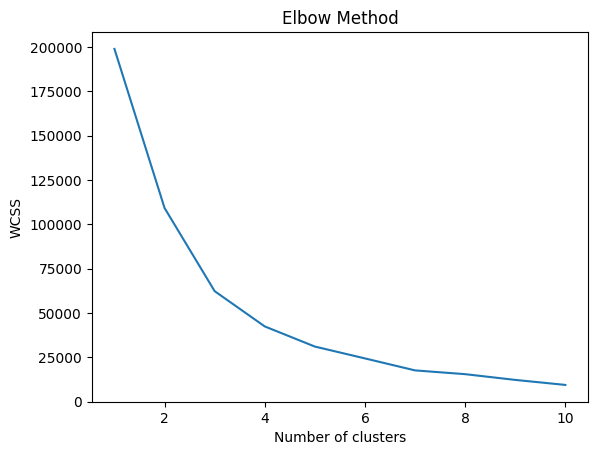

In [141]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### K=2

In [156]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [157]:
centroid = kmeans.cluster_centers_

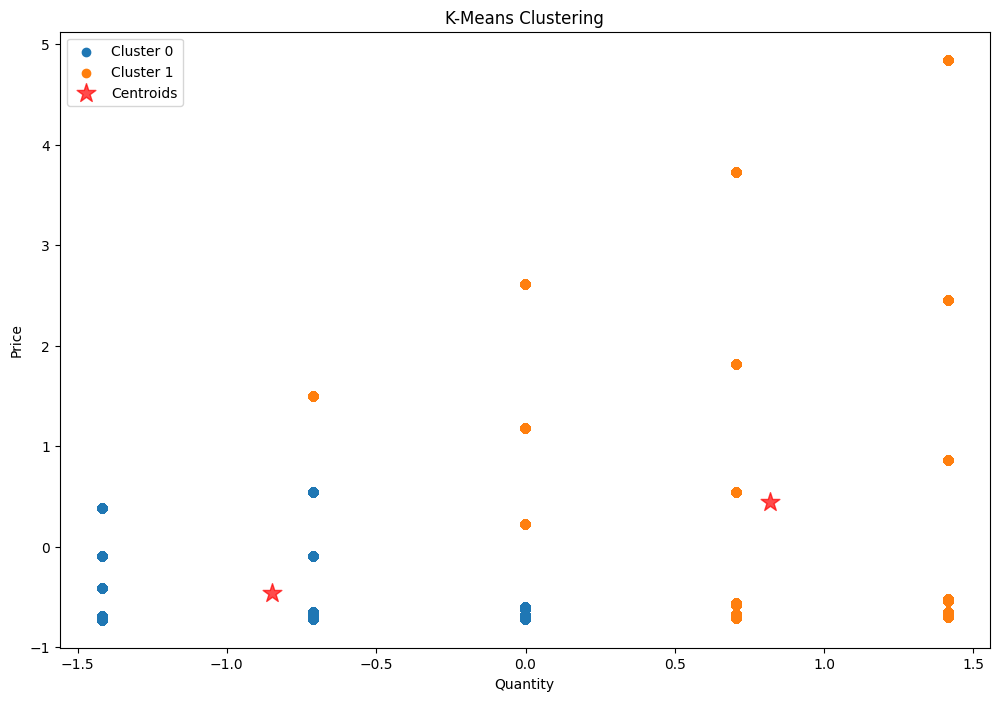

In [158]:
# Visualisasi klaster
plt.figure(figsize=(12, 8))

# Memisahkan data berdasarkan klaster
for i in range(2):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i}')

# Menampilkan centroid
plt.scatter(centroid[:, 0], centroid[:, 1], marker='*', c='red', s=200, alpha=0.7, label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Quantity')
plt.ylabel('Price')

# Menambahkan legenda
plt.legend()

plt.show()

In [159]:
centroid

array([[-0.84848901, -0.46440149],
       [ 0.81797699,  0.44770141]])

In [160]:
df_new['claster_k2'] = labels
df_new

# 0 : Low Quality, Low Price
# 1 : High Quality, High Price

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,frequency,total_price,claster_k2,claster_k4
0,I138884,C241288,0,28,0,5,1500.40,Credit Card,2022-08-05,1,7502.00,1,1
1,I317333,C111565,1,21,1,3,1800.51,Debit Card,2021-12-12,1,5401.53,1,1
2,I127801,C266599,1,20,0,1,300.08,Cash,2021-11-09,1,300.08,0,0
3,I173702,C988172,0,66,1,5,3000.85,Credit Card,2021-05-16,1,15004.25,1,3
4,I337046,C189076,0,53,2,4,60.60,Cash,2021-10-24,1,242.40,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,0,45,7,5,58.65,Credit Card,2022-09-21,1,293.25,1,2
99453,I325143,C569580,1,27,4,2,10.46,Cash,2021-09-22,1,20.92,0,0
99454,I824010,C103292,1,63,4,2,10.46,Debit Card,2021-03-28,1,20.92,0,0
99455,I702964,C800631,1,56,6,4,4200.00,Cash,2021-03-16,1,16800.00,1,3


In [161]:
claster_k2 = df_new[df_new['claster_k2'] == 1]
claster_k2

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,frequency,total_price,claster_k2,claster_k4
0,I138884,C241288,0,28,0,5,1500.40,Credit Card,2022-08-05,1,7502.00,1,1
1,I317333,C111565,1,21,1,3,1800.51,Debit Card,2021-12-12,1,5401.53,1,1
3,I173702,C988172,0,66,1,5,3000.85,Credit Card,2021-05-16,1,15004.25,1,3
4,I337046,C189076,0,53,2,4,60.60,Cash,2021-10-24,1,242.40,1,2
5,I227836,C657758,0,28,0,5,1500.40,Credit Card,2022-05-24,1,7502.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99445,I750456,C270290,0,35,4,5,26.15,Cash,2021-05-07,1,130.75,1,2
99448,I332105,C231387,0,65,1,4,2400.68,Credit Card,2021-08-29,1,9602.72,1,1
99451,I675411,C513603,1,50,5,5,179.20,Cash,2021-10-09,1,896.00,1,2
99452,I219422,C441542,0,45,7,5,58.65,Credit Card,2022-09-21,1,293.25,1,2


#### K=4

In [148]:
kmeans4 = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels4 = kmeans4.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [149]:
centroid4 = kmeans4.cluster_centers_

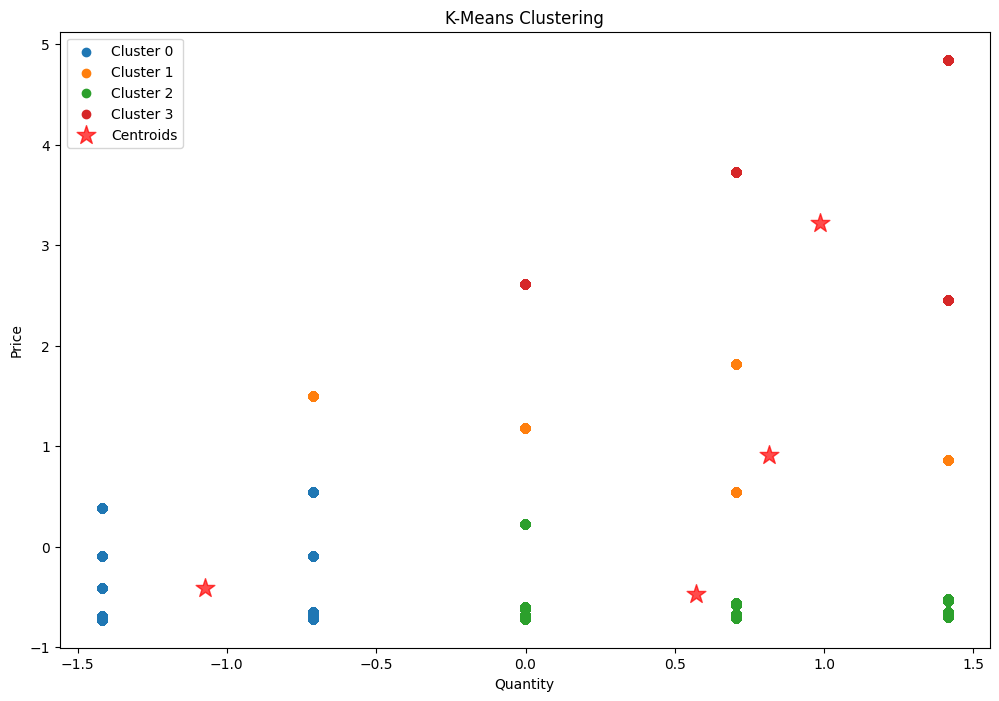

In [150]:
# Visualisasi klaster
plt.figure(figsize=(12, 8))

# Memisahkan data berdasarkan klaster
for i in range(4):
    plt.scatter(X[labels4 == i, 0], X[labels4 == i, 1], label=f'Cluster {i}')

# Menampilkan centroid
plt.scatter(centroid4[:, 0], centroid4[:, 1], marker='*', c='red', s=200, alpha=0.7, label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Quantity')
plt.ylabel('Price')

# Menambahkan legenda
plt.legend()

plt.show()

In [151]:
centroid4

array([[-1.07259311, -0.41349772],
       [ 0.81545212,  0.91647986],
       [ 0.56965282, -0.47158692],
       [ 0.98771265,  3.21787618]])

In [152]:
df_new['claster_k4'] = labels4
df_new

# 0 : Low Quality, Low Price
# 1 : High Quality, Medium Price
# 2 : High Quality, Low Price
# 3 : High Quality, High Price

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,frequency,total_price,claster_k2,claster_k4
0,I138884,C241288,0,28,0,5,1500.40,Credit Card,2022-08-05,1,7502.00,1,1
1,I317333,C111565,1,21,1,3,1800.51,Debit Card,2021-12-12,1,5401.53,1,1
2,I127801,C266599,1,20,0,1,300.08,Cash,2021-11-09,1,300.08,0,0
3,I173702,C988172,0,66,1,5,3000.85,Credit Card,2021-05-16,1,15004.25,1,3
4,I337046,C189076,0,53,2,4,60.60,Cash,2021-10-24,1,242.40,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,0,45,7,5,58.65,Credit Card,2022-09-21,1,293.25,1,2
99453,I325143,C569580,1,27,4,2,10.46,Cash,2021-09-22,1,20.92,0,0
99454,I824010,C103292,1,63,4,2,10.46,Debit Card,2021-03-28,1,20.92,0,0
99455,I702964,C800631,1,56,6,4,4200.00,Cash,2021-03-16,1,16800.00,1,3


In [153]:
claster_k4 = df_new[df_new['claster_k4'] == 3]
claster_k4

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,frequency,total_price,claster_k2,claster_k4
3,I173702,C988172,0,66,1,5,3000.85,Credit Card,2021-05-16,1,15004.25,1,3
15,I688768,C362288,1,24,1,5,3000.85,Credit Card,2021-11-07,1,15004.25,1,3
23,I252275,C313348,1,44,6,5,5250.00,Cash,2021-10-26,1,26250.00,1,3
53,I160777,C626042,0,43,6,4,4200.00,Cash,2022-02-22,1,16800.00,1,3
69,I883721,C236859,0,44,6,5,5250.00,Credit Card,2021-11-19,1,26250.00,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99332,I206967,C232954,0,53,1,5,3000.85,Credit Card,2022-03-13,1,15004.25,1,3
99374,I221532,C956894,1,36,6,3,3150.00,Credit Card,2021-12-24,1,9450.00,1,3
99387,I429361,C258359,1,33,6,3,3150.00,Credit Card,2022-08-01,1,9450.00,1,3
99424,I549710,C541824,0,34,6,3,3150.00,Cash,2021-01-13,1,9450.00,1,3


In [154]:
file_path = f'{path}/My Drive/data mining tb/segment_customer_shopping_data.csv'
df_new.to_csv(file_path, index=False)

## **Evaluasi Klastering**

In [155]:
# Silhouette Score k=2
silhouette = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette}")

# Silhouette Score k=4
silhouette4 = silhouette_score(X, labels4)
print(f"Silhouette Score4: {silhouette4}")

Silhouette Score: 0.4519642660700657
Silhouette Score4: 0.5211745727646698
